# GOLD PRICE PREDICTION


### - Yogesh Meka

#### Importing required packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

#### Loading the dataset

In [1]:
dataset = pd.read_csv('gld_price_data.csv')

print(dataset)

NameError: name 'pd' is not defined

In [6]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#### Exploratory Data Analysis

In [7]:
print(dataset.shape)

(2290, 6)


In [8]:
dataset.isnull().sum().sum()

0

In [9]:
#Let's check if there are any duplicate rows

duplicate_rows = dataset[dataset.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (0, 6)


#### Heatmap

<AxesSubplot:>

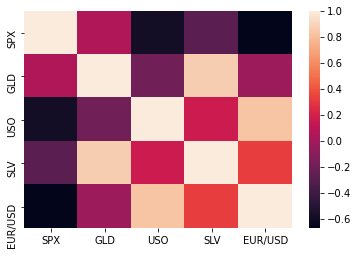

In [10]:
sns.heatmap(dataset.corr())

#### Correlation Analysis

<AxesSubplot:>

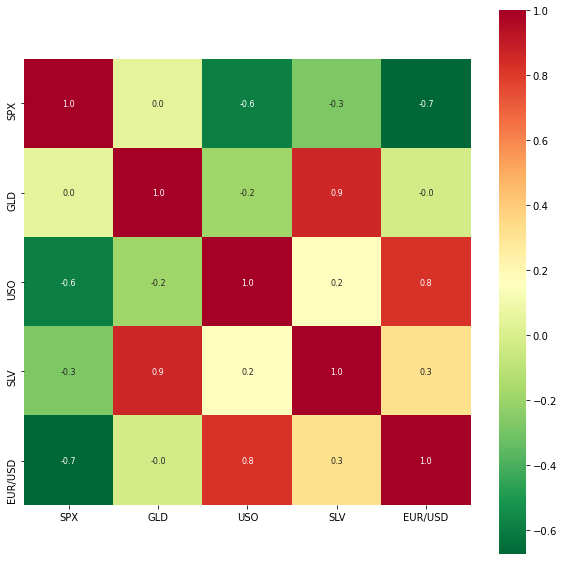

In [11]:
correlation = dataset.corr()

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square=True, fmt= '.1f', annot=True, annot_kws= {'size': 8}, cmap = 'RdYlGn_r')

#### Gold Prices over months

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Gold Price'),
 Text(0.5, 1.0, 'Gold Price over months')]

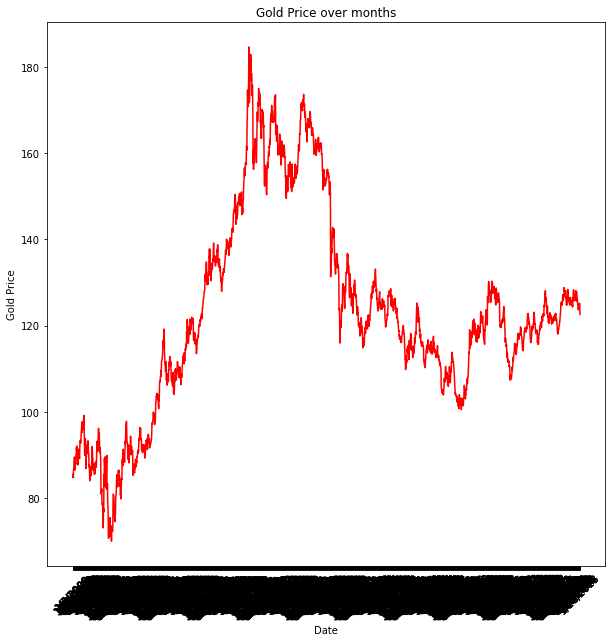

In [13]:
fig, ax = plt.subplots(figsize = (10,10))

# add the x-axis and the y-axis to the plot
ax.plot(dataset['Date'], 
        dataset['GLD'], 
        color = 'red')

# rotate tick labels
plt.setp(ax.get_xticklabels(), rotation=45)

# set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Gold Price",
       title="Gold Price over months")

#### Checking the density of our target variable GLD

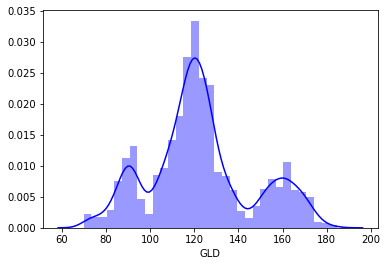

In [13]:
sns.distplot(dataset['GLD'], color = 'blue')
# Lets Check our target variable

In [14]:
#Extracting the Dependent and Independent Variables

x = dataset.drop(['Date', 'GLD'], axis=1)
y = dataset['GLD']

In [15]:
#Splitting the dataset into training and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(1832, 4) (458, 4)


In [16]:
def fit_predict(model1):
    model = model1
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    print('RSS: ', metrics.r2_score(y_test, y_predict))
    print('MAE :', metrics.mean_absolute_error(y_test, y_predict))
    plt.scatter(y_test, y_predict)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Price of Gold')
    plt.show()
    plt.scatter(y_test, y_predict, c='crimson')
    p1 = max(max(y_predict), max(y_train))
    p2 = min(min(y_predict), min(y_train))
    plt.plot([p1,p2], [p1,p2], 'b-')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Price')
    plt.show()

#### Linear Regression

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [18]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [19]:
training_data_prediction = model.predict(x_train)

In [20]:
testing_data_prediction = model.predict(x_test)

In [21]:
R_square_score = metrics.r2_score(y_train, training_data_prediction)
Mean_absolute_error = metrics.mean_absolute_error(y_train, training_data_prediction)
print("R_squared_error :", R_square_score)
print('Mean absolute_error :',Mean_absolute_error)

R_squared_error : 0.8771892526181604
Mean absolute_error : 6.118035850691067


#### Random Forest Regression

RSS:  0.989245987594427
MAE : 1.2481439955895202


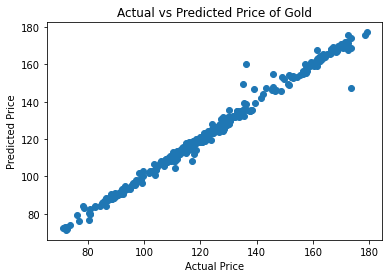

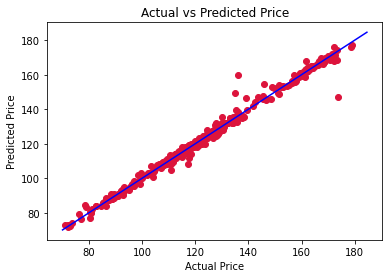

In [22]:
from sklearn.ensemble import RandomForestRegressor
fit_predict(RandomForestRegressor(n_estimators = 100, random_state = 0))

#### XGBoost Regression

RSS:  0.9890564949875807
MAE : 1.4657916973860963


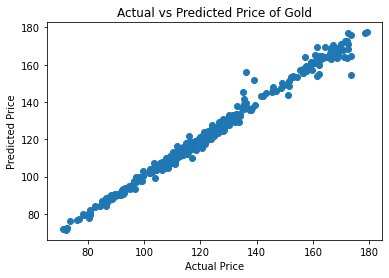

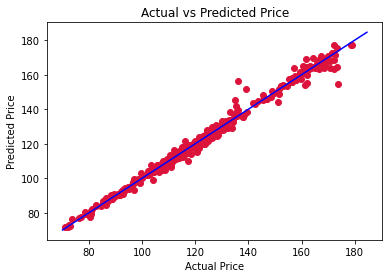

In [31]:
from xgboost import XGBRegressor
fit_predict(XGBRegressor())

Since we find that the accuracy obtained from using XGBoost Regression is comparatively higher, we will use this as our learning algorithm.

#### Create a test case

In [32]:
model = XGBRegressor()                                    
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [33]:
input = x[18:19]
actual_charges = y[18:19]
print(input)

            SPX        USO     SLV   EUR/USD
18  1362.300049  72.980003  16.534  1.477192


In [34]:
print("Actual charges: ",actual_charges)

Actual charges:  18    91.150002
Name: GLD, dtype: float64


In [35]:
predicted_charges = model.predict(input)

In [36]:
print("Predicted charges: ",predicted_charges)

Predicted charges:  [90.78551]


##### Submitted By-

Rhugved Kale 

Prasad Badhan

Sahil Mulay